# Classify Song Genres from Audio Data

Reads the CSV file containing track metadata with genre labels and assigns it to the DataFrame tracks

In [2]:
import pandas as pd
tracks = pd.read_csv('fma-rock-vs-hiphop.csv')
tracks

,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
0,135,256000,1,NaN,2008-11-26 01:43:26,2008-11-26 00:00:00,837,0,Rock,"[45, 58]",...,NaN,2484,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1832,NaN,0,NaN,[],Father's Day
1,136,256000,1,NaN,2008-11-26 01:43:35,2008-11-26 00:00:00,509,0,Rock,"[45, 58]",...,NaN,1948,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1498,NaN,0,NaN,[],Peel Back The Mountain Sky
2,151,192000,0,NaN,2008-11-26 01:44:55,NaN,192,0,Rock,[25],...,NaN,701,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,148,NaN,4,NaN,[],Untitled 04
3,152,192000,0,NaN,2008-11-26 01:44:58,NaN,193,0,Rock,[25],...,NaN,637,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,98,NaN,11,NaN,[],Untitled 11
4,153,256000,0,Arc and Sender,2008-11-26 01:45:00,2008-11-26 00:00:00,405,5,Rock,[26],...,NaN,354,en,Attribution-NonCommercial-NoDerivatives (aka M...,424,NaN,2,NaN,[],Hundred-Year Flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17729,155063,320000,0,NaN,2017-03-24 19:40:43,NaN,283,3,Hip-Hop,"[21, 811]",...,NaN,1283,NaN,Attribution,1050,NaN,4,NaN,"['old school beats', '2017 free instrumentals'...",Been On
17730,155064,320000,0,NaN,2017-03-24 19:40:44,NaN,250,2,Hip-Hop,"[21, 811]",...,NaN,1077,NaN,Attribution,858,NaN,2,NaN,"['old school beats', '2017 free instrumentals'...",Send Me
17731,155065,320000,0,NaN,2017-03-24 19:40:45,NaN,219,3,Hip-Hop,"[21, 811]",...,NaN,1340,NaN,Attribution,1142,NaN,1,NaN,"['old school beats', '2017 free instrumentals'...",The Question
17732,155066,320000,0,NaN,2017-03-24 19:40:47,NaN,252,6,Hip-Hop,"[21, 811]",...,NaN,2065,NaN,Attribution,1474,NaN,3,NaN,"['old school beats', '2017 free instrumentals'...",Roy


Reads the JSON file containing track metrics with features and assigns it to the DataFrame echonest_metrics. 
The argument precise_float=True is used to ensure the accuracy of floating-point numbers during the reading of the JSON file.

In [3]:
echonest_metrics = pd.read_json('echonest-metrics.json',precise_float= True)
echonest_metrics

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
3,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590
4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072
...,...,...,...,...,...,...,...,...,...
13124,124857,0.007592,0.790364,0.719288,0.853114,0.720715,0.082550,141.332,0.890461
13125,124862,0.041498,0.843077,0.536496,0.865151,0.547949,0.074001,101.975,0.476845
13126,124863,0.000124,0.609686,0.895136,0.846624,0.632903,0.051517,129.996,0.496667
13127,124864,0.327576,0.574426,0.548327,0.452867,0.075928,0.033388,142.009,0.569274


Merges the relevant columns of the echonest_metrics and tracks DataFrames, selecting only the 'track_id' and 'genre_top' columns from the tracks DataFrame. The merge is based on the 'track_id' column, and only rows that have matches in both DataFrames are retained.

In [4]:
data = pd.merge(echonest_metrics,tracks[['track_id','genre_top']],on='track_id',how='inner')
data

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top
0,2,0.416675,0.675894,0.634476,1.062807e-02,0.177647,0.159310,165.922,0.576661,Hip-Hop
1,3,0.374408,0.528643,0.817461,1.851103e-03,0.105880,0.461818,126.957,0.269240,Hip-Hop
2,5,0.043567,0.745566,0.701470,6.967990e-04,0.373143,0.124595,100.260,0.621661,Hip-Hop
3,134,0.452217,0.513238,0.560410,1.944269e-02,0.096567,0.525519,114.290,0.894072,Hip-Hop
4,153,0.988306,0.255661,0.979774,9.730057e-01,0.121342,0.051740,90.241,0.034018,Rock
...,...,...,...,...,...,...,...,...,...,...
4797,124718,0.412194,0.686825,0.849309,6.000000e-10,0.867543,0.367315,96.104,0.692414,Hip-Hop
4798,124719,0.054973,0.617535,0.728567,7.215700e-06,0.131438,0.243130,96.262,0.399720,Hip-Hop
4799,124720,0.010478,0.652483,0.657498,7.098000e-07,0.701523,0.229174,94.885,0.432240,Hip-Hop
4800,124721,0.067906,0.432421,0.764508,1.625500e-06,0.104412,0.310553,171.329,0.580087,Hip-Hop


### Correlations Among Continuous Variables
In this section, we will explore the relationships between continuous variables in our dataset. The goal is to identify any strong correlations between variables. By visualizing the correlation matrix and identifying pairs of variables with high correlation coefficients, we can make informed decisions about feature selection and data preprocessing.

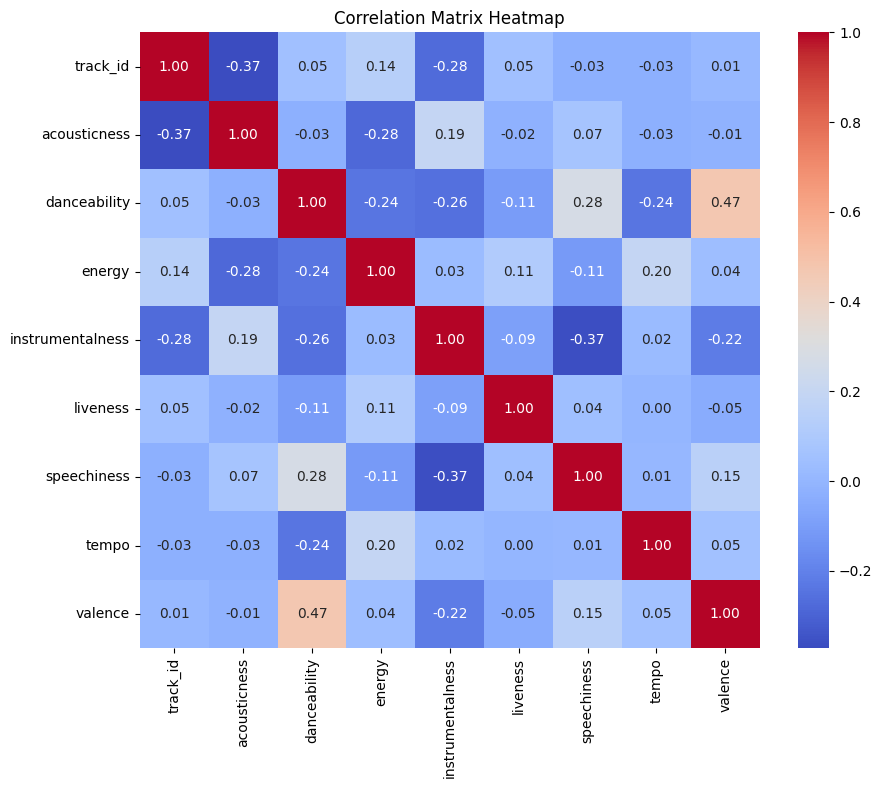

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_data= data.corr(method='pearson', min_periods=1, numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

### Class Balance Check 
One crucial aspect of EDA was checking the balance of classes in our target variable (genre_top). This involved counting the number of samples for each class to ensure that there was no significant class imbalance, which could affect the performance of our machine learning models.

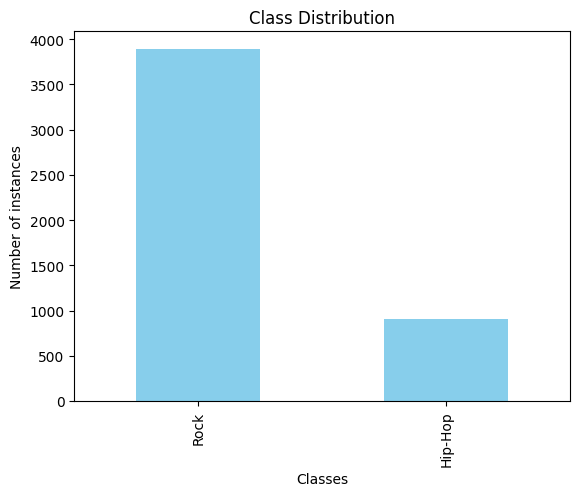

Class Proportions:
genre_top
Rock       0.810496
Hip-Hop    0.189504
Name: count, dtype: float64


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

class_counts = data['genre_top'].value_counts()

# Visualize the class distribution
class_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Classes')
plt.ylabel('Number of instances')
plt.title('Class Distribution')
plt.show()

# Calculate the class proportions
class_proportions = class_counts / len(data)

# Print the class proportions
print("Class Proportions:")
print(class_proportions)

### Splitting our Data
In this step, we're going to divide our dataset into two separate arrays: one containing the features and the other containing the corresponding labels (the genre of each track). This separation allows us to prepare our data for further analysis and model development.

Since we didn't observe any significant correlations between our features in the previous step, we can proceed with splitting the data without the need for feature selection based on correlation.

In [7]:
# Import train_test_split function and Decision tree classifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
features = data.drop(columns=['track_id','genre_top'], axis=1).values
labels = data[['genre_top']].values
# Split our data
train_features, test_features, train_labels, test_labels = train_test_split(features,labels,random_state=10)

### Standardizing the feature data
In our quest to streamline our models and optimize performance, we seek to minimize the number of features while maximizing predictive accuracy. Despite the absence of pronounced correlations among our features, we can adopt a widely-used technique known as Principal Component Analysis (PCA) to achieve this.

PCA aims to capture the majority of the dataset's variance by identifying the principal axes along which the data varies the most. By rotating the data onto these axes, we can discern the relative importance of each feature in explaining the variation between different classes or genres.

However, PCA operates under the assumption that features with larger variances inherently contribute more to the data's overall variance. To prevent features with broader value ranges from disproportionately influencing the analysis, we must first normalize our training and testing features. Standardization, a common normalization method, transforms each feature such that it has a mean of 0 and a standard deviation of 1, yielding a z-score. This ensures that all features are on a comparable scale, enabling PCA to make more accurate assessments of feature importance.

In [8]:
# Import the StandardScaler
from sklearn.preprocessing import StandardScaler
# Scale the features and set the values to a new variable
scaler = StandardScaler()
# Scale train_features and test_features
scaled_train_features = scaler.fit_transform(train_features)
scaled_test_features = scaler.transform(test_features)

### Principal Component Analysis (PCA) on Scaled Data

In this section, we apply Principal Component Analysis (PCA) to our preprocessed data to explore the reduction of dimensionality. PCA helps us understand how much we can simplify our data while retaining essential information. 

**Scree-plots:** These plots illustrate the variance explained by each component, sorted in descending order. They assist in determining the number of components needed for further analysis. Typically, an "elbow" in the plot indicates the optimal cutoff point, where a significant drop in variance occurs.

**Cumulative Explained Ratio Plots:** These plots show the cumulative variance explained by adding additional components. They provide insights into how much of the total variance is captured by a given number of components, aiding in decision-making regarding the number of components to retain.

Text(0.5, 0, 'Principal Component')

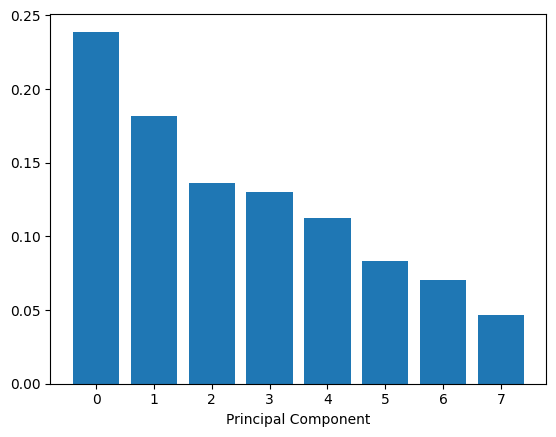

In [9]:
# Import our plotting module, and PCA class
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# Get our explained variance ratios from PCA using all features
pca = PCA()
pca.fit(scaled_train_features)
exp_variance = pca.explained_variance_ratio_
# plot the explained variance using a barplot
fig, ax = plt.subplots()
ax.bar(range(pca.n_components_), exp_variance)
ax.set_xlabel('Principal Component')

Upon analyzing the scree plot, we find that there is no clear elbow, making it challenging to identify the number of intrinsic dimensions using this method alone. 
To overcome this limitation, we turn to the cumulative explained variance plot. This plot helps us understand how many features are needed to explain a certain percentage of the variance in the data, typically around 85%. By examining this plot, we aim to determine the optimal number of components required to capture a significant portion of the variance.

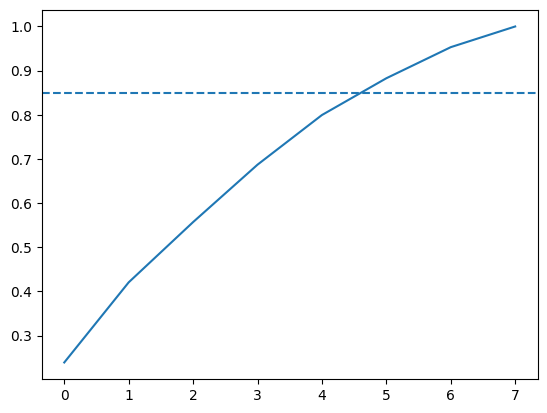

In [10]:
# import numpy
import numpy as np
# Calculate the cumulative explained variance
cum_exp_variance = np.cumsum(exp_variance)
# Plot the cumulative explained variance and draw a dashed line at 0.85.
fig, ax = plt.subplots()
ax.plot(cum_exp_variance)
ax.axhline(y=0.85, linestyle='--')

Based on our analysis, we observed that 6 features, indexed starting from 0, can explain approximately 85% of the variance in our data. This finding suggests that using 6 components in PCA could effectively reduce the dimensionality of both our train and test features while retaining a significant amount of information.

In [11]:
# Perform PCA with the chosen number of components and project data onto components
pca = PCA(n_components=6,random_state=10)
# Fit and transform the scaled training features using pca
train_pca = pca.fit_transform(scaled_train_features)
# Fit and transform the scaled test features using pca
test_pca = pca.transform(scaled_test_features)

### Training a Decision Tree Classifier

In this step, we leverage the lower-dimensional PCA projection of our data to train a classifier capable of categorizing songs into genres. We opt for a straightforward algorithm called a decision tree.
By training a decision tree classifier on our PCA-transformed data, we aim to create a simple yet effective model for genre classification. This approach enables us to gain valuable insights into the underlying patterns in our dataset and lays the foundation for further analysis and model refinement.

In [12]:
# Import Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
# Train our decision tree
tree = DecisionTreeClassifier(random_state=10)
tree.fit(train_pca,train_labels)
# Predict the labels for the test data
pred_labels_tree = tree.predict(test_pca)

              precision    recall  f1-score   support

     Hip-Hop       0.63      0.62      0.62       235
        Rock       0.91      0.91      0.91       966

    accuracy                           0.85      1201
   macro avg       0.77      0.77      0.77      1201
weighted avg       0.85      0.85      0.85      1201



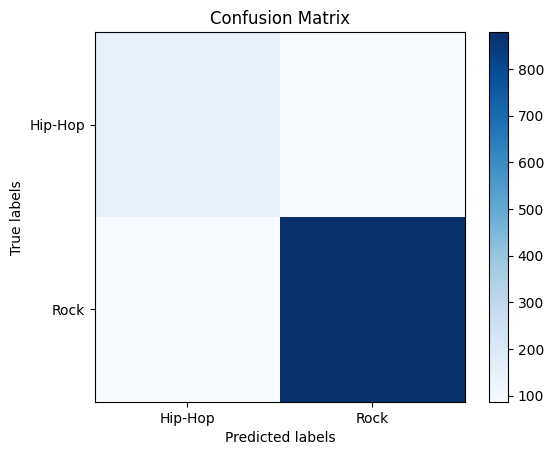

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Evaluate the accuracy of the model
print(classification_report(test_labels, pred_labels_tree))

# Plot the confusion matrix
cm = confusion_matrix(test_labels, pred_labels_tree)
plt.imshow(cm, cmap=plt.cm.Blues, interpolation='nearest')
plt.colorbar()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.xticks([0, 1], ['Hip-Hop', 'Rock'])
plt.yticks([0, 1], ['Hip-Hop', 'Rock'])
plt.title('Confusion Matrix')
plt.show()

Here are some conclusions based on the results:

1. **Precision**: The classification precision for the Hip-Hop class is 63%, meaning that out of all instances classified as Hip-Hop, 63% actually belong to that class. For the Rock class, the precision is 91%, indicating more accurate classification of Rock instances.

2. **Recall**: Recall (also known as sensitivity) measures the proportion of relevant instances that were correctly classified. For the Hip-Hop class, recall is 62%, meaning the model correctly identified 62% of all actual Hip-Hop instances. For the Rock class, recall is 91%, indicating the model's good ability to detect Rock instances.

3. **F1-score**: The F1-score is a measure that combines precision and recall into a single number. It is useful when there is class imbalance, as in this case. The F1-score for Hip-Hop is 62%, and for Rock, it is 91%. These values indicate a good balance between precision and recall for both classes.

4. **Accuracy**: The overall accuracy of the model is 85%, indicating that 85% of all instances were classified correctly.

In summary, the model shows good performance in classifying the Rock class, with high precision, recall, and F1-score values. However, its performance in classifying the Hip-Hop class is slightly lower in comparison, suggesting that it could benefit from improvement in its ability to detect instances of that class.

### Comparing Decision Tree and Logistic Regression Models

In this step, we compared the performance of our decision tree classifier with that of logistic regression. Here's what's happening:

1. **Decision Tree Evaluation**: We previously trained a decision tree classifier to classify songs into genres. While its performance was decent, we wanted to explore whether other models might perform better.

2. **Considering Alternative Models**: To ensure that we are using the most suitable model for our data, we decided to test logistic regression as an alternative. Logistic regression is a simple yet powerful algorithm that calculates the odds of a data point belonging to a particular class using the logistic function.

3. **Performance Metrics Comparison**: After training both models, we compared them based on various performance metrics, including false positive rate, false negative rate, accuracy, precision, recall, and F1-score. By evaluating these metrics, we can determine which model best suits our data and problem requirements.

The goal of this comparison is to identify the most effective model for classifying songs into genres. By considering multiple algorithms and assessing their performance, we can make an informed decision about which model to deploy in our final classification task.


In [14]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression
# Train our logistic regression and predict labels for the test set
logreg = LogisticRegression(random_state=10)
logreg.fit(train_pca,train_labels)
pred_labels_logit = logreg.predict(test_pca)

/home/aylusolguzman/audio_data/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

     Hip-Hop       0.77      0.54      0.64       235
        Rock       0.90      0.96      0.93       966

    accuracy                           0.88      1201
   macro avg       0.83      0.75      0.78      1201
weighted avg       0.87      0.88      0.87      1201



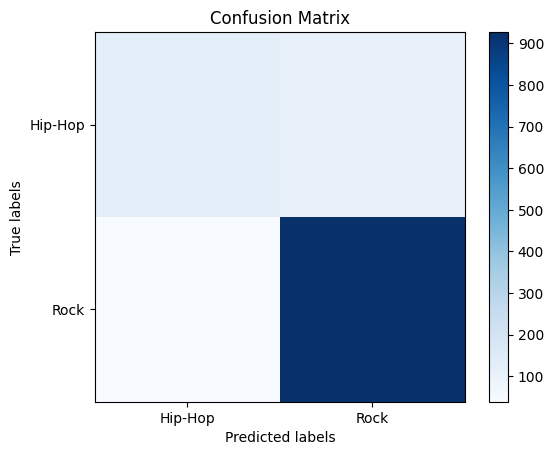

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Evaluate the accuracy of the model
print(classification_report(test_labels, pred_labels_logit))

# Plot the confusion matrix
cm2 = confusion_matrix(test_labels, pred_labels_logit)
plt.imshow(cm2, cmap=plt.cm.Blues, interpolation='nearest')
plt.colorbar()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.xticks([0, 1], ['Hip-Hop', 'Rock'])
plt.yticks([0, 1], ['Hip-Hop', 'Rock'])
plt.title('Confusion Matrix')
plt.show()

### Balancing Data for Better Model Performance

To improve our models' accuracy, we're addressing a key issue: the uneven distribution of data points between hip-hop and rock songs. Despite both models achieving 87% average precision, we've noticed more misclassifications of hip-hop as rock. This could stem from the larger number of rock data points, skewing the models towards favoring rock classification. To rectify this, we'll implement class weighting, ensuring fair treatment of both genres in our predictions.

In [17]:
# Subset only the hip-hop tracks, and then only the rock tracks
hop_only = data.loc[data['genre_top']== 'Hip-Hop']
rock_only = data.loc[data['genre_top']== 'Rock']

# sample the rocks songs to be the same number as there are hip-hop songs
rock_only = rock_only.sample(hop_only.shape[0],random_state=10)

# concatenate the dataframes rock_only and hop_only
rock_hop_bal = pd.concat([rock_only,hop_only])

# The features, labels, and pca projection are created for the balanced dataframe
features = rock_hop_bal.drop(['genre_top', 'track_id'], axis=1) 
labels = rock_hop_bal['genre_top']

# Redefine the train and test set with the pca_projection from the balanced data
train_features, test_features, train_labels, test_labels = train_test_split(features,labels, random_state=10)

train_pca = pca.fit_transform(scaler.fit_transform(train_features))
test_pca = pca.transform(scaler.transform(test_features))

### Does Balancing Data Help with Model Bias?
We balanced our dataset to ensure fairness in class representation, especially for "Rock" classification. However, this might mean losing some crucial data. We'll test if balancing improves bias towards "Rock" while keeping overall performance. We won't reduce dimensions here, as we've already trimmed the dataset. Typically, we'd consider dimensionality reduction for large datasets to save time.

In [19]:
# Train our decision tree on the balanced data
# Import Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
# Train our decision tree
tree = DecisionTreeClassifier(random_state=10)
tree.fit(train_pca,train_labels)
# Predict the labels for the test data
pred_labels_tree = tree.predict(test_pca)

# Train our logistic regression on the balanced data
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression
# Train our logistic regression and predict labels for the test set
logreg = LogisticRegression(random_state=10)
logreg.fit(train_pca,train_labels)
pred_labels_logit = logreg.predict(test_pca)

# Compare the models
print("Decision Tree: \n", classification_report(test_labels,pred_labels_tree))
print("Logistic Regression: \n", classification_report(test_labels,pred_labels_logit))

Decision Tree: 
               precision    recall  f1-score   support

     Hip-Hop       0.82      0.77      0.79       230
        Rock       0.78      0.82      0.80       225

    accuracy                           0.80       455
   macro avg       0.80      0.80      0.80       455
weighted avg       0.80      0.80      0.80       455

Logistic Regression: 
               precision    recall  f1-score   support

     Hip-Hop       0.84      0.80      0.82       230
        Rock       0.81      0.85      0.83       225

    accuracy                           0.82       455
   macro avg       0.82      0.82      0.82       455
weighted avg       0.83      0.82      0.82       455



## Using Cross-Validation to Evaluate Our Models

We've achieved success. Balancing the data has removed bias towards the most prevalent class. To gauge how well our models perform, we can employ what's known as cross-validation (CV). This step allows us to compare models more rigorously.

Before we can conduct cross-validation, we'll need to create pipelines to scale our data, perform PCA, and instantiate the model of our choice: DecisionTreeClassifier or LogisticRegression.

Since how our data is split into training and testing sets can impact model performance, CV tries different data splits and tests the model on each. Although there are many different CV methods, each with its own pros and cons, here we'll use one known as K-fold CV. K-fold first divides the data into K different subsets of equal size. It then iteratively uses each subset as the test set while using the rest of the data as training sets. Finally, we can aggregate the results of each fold to get a final score of model performance.
